In [1]:
import matplotlib.pyplot as plt
import numpy as np

from noise import pnoise2

from random import randint

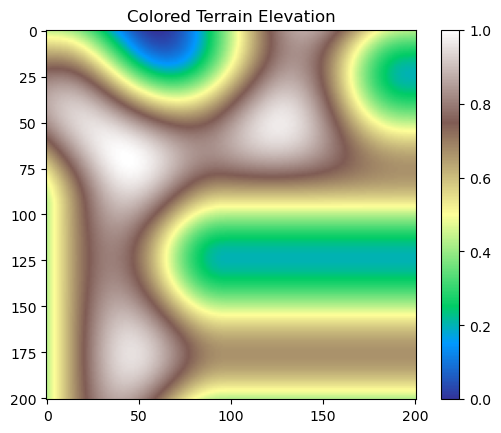

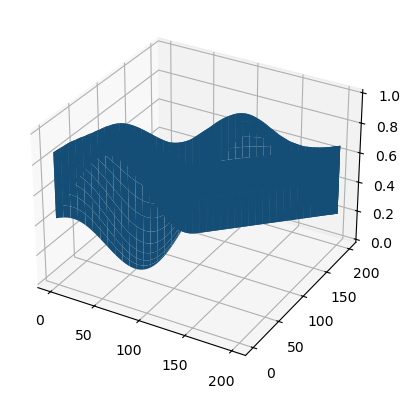

In [3]:
# Generate 2D Perlin noise at coordinates (x, y)
width = 201
height = 201
scale = 100.0

octaves = 1  # Number of noise layers
persistence = 0.6 # Amplitude of each successive octave
lacunarity = 2.0 # Frequency multiplier between octaves
# base =  randint(0,1000) # Base seed for the noise (optional)
base = 979

terrain = np.zeros((height, width))

for i in range(height):
    for j in range(width):
        terrain[i][j] = pnoise2(i / scale,
                                j / scale,
                                octaves=octaves,
                                persistence=persistence,
                                lacunarity=lacunarity,
                                repeatx=width,
                                repeaty=height,
                                base=base)

# Gradiente
grad_terrain = np.gradient(terrain)

# Normalize terrain values to 0–1
normalized_terrain = (terrain - terrain.min()) / (terrain.max() - terrain.min())

# Colored elevation map
plt.imshow(normalized_terrain, cmap='terrain')
plt.title("Colored Terrain Elevation")
plt.colorbar()
plt.show()

ax = plt.figure().add_subplot(projection='3d')

x = y = np.linspace(0,200,201)
ax.plot_surface(x, y, normalized_terrain)

In [311]:
dt = 1
g = 10
friction = .01

class droplet():
    def __init__(self, height, width):
        self.inbounds = True
        self.ipos = np.random.randint([0,0],[height-1, width-1], 2)
        self.pos = np.array(self.ipos, float)
        self.vel = np.zeros(2)

        self.path = [self.pos]

    def step(self, grad_terrain, dt):
        if not self.inbounds:
            return
        
        # try:
        #     slope = np.array((grad_terrain[0][*self.ipos],grad_terrain[1][*self.ipos]))
        # except IndexError:
        #     print(self.ipos)
        #     return
        slope = np.array((grad_terrain[0][*self.ipos],grad_terrain[1][*self.ipos]))

        self.vel -= dt*slope*g
        self.pos += dt*self.vel
        self.vel *= (1-dt*friction)
        self.ipos = np.array(self.pos, int)
        
        # Check q esta en la grilla
        if self.ipos[0] < height and self.ipos[1] < width:
            if self.ipos[0] >= 0 and self.ipos[1] >= 0:
                self.path.append(np.array(self.pos, copy = True))
            else: 
                print("out of bounds")
                self.inbounds = False
                return 
        else: 
            print("out of bounds")
            self.inbounds = False
            return 

In [312]:
paths = []

for i in range(50):
        pepe = droplet(height, width)

        i=0
        while pepe.inbounds and i < 1000:
                pepe.step(grad_terrain = grad_terrain, dt = dt)
                # print(pepe.pos, pepe.ipos, pepe.path[-1])
                i+=1

        paths.append(np.array(pepe.path, copy = True))

out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds
out of bounds


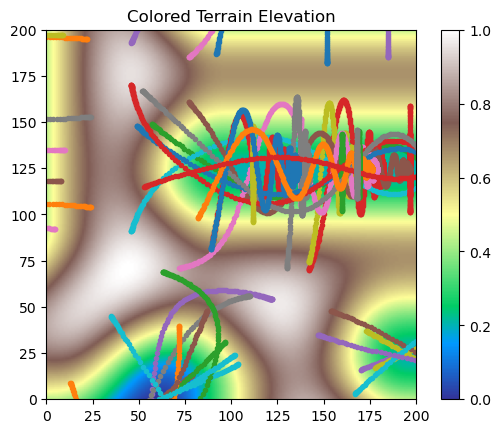

In [313]:
fig, ax = plt.subplots()

map = ax.imshow(normalized_terrain, cmap='terrain')
plt.colorbar(map, ax = ax)
ax.set_title("Colored Terrain Elevation")
ax.set(xlim = (0,200), ylim = (0,200))

for path in paths:
    path_x, path_y = [a[1] for a in path],[a[0] for a in path]

    ax.plot(path_x,path_y, ".")

In [16]:
grad_terrain[0][*pepe.pos],grad_terrain[0][1,146]

(np.float64(-0.004225090146064758), np.float64(-0.004225090146064758))